In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Required model metrics for dataset
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
#Loading the data
df1=pd.read_csv('olx_for_scrapedatset_for_car_price_prediction.csv')  
df1.head()  

Unnamed: 0 Brand_of_car Manufacturing_year Price_of_car Driven_kilometer  \
0           0     Mahindra               2020    12,40,000        14,000 km   
1           1            -                  -            -                -   
2           2        Honda               2016     6,45,000        38,000 km   
3           3     Mahindra               2016     4,30,000        23,000 km   
4           4     Mahindra               2018     5,90,000        67,000 km   

       FUel_used transmission_system  
0         Diesel              Manual  
1              -                   -  
2         Petrol              Manual  
3  CNG & Hybrids              Manual  
4         Diesel              Manual

In [4]:
#Drop Unnamed column
df1.drop(['Unnamed: 0'],axis=1,inplace=True)


In [5]:
df1.head()  #Check the dataset after drop

Brand_of_car Manufacturing_year Price_of_car Driven_kilometer  \
0     Mahindra               2020    12,40,000        14,000 km   
1            -                  -            -                -   
2        Honda               2016     6,45,000        38,000 km   
3     Mahindra               2016     4,30,000        23,000 km   
4     Mahindra               2018     5,90,000        67,000 km   

       FUel_used transmission_system  
0         Diesel              Manual  
1              -                   -  
2         Petrol              Manual  
3  CNG & Hybrids              Manual  
4         Diesel              Manual

In [6]:
df1.shape

(40, 6)

In [7]:
# the  feature of the dataset
df1.dtypes

Brand_of_car           object
Manufacturing_year     object
Price_of_car           object
Driven_kilometer       object
FUel_used              object
transmission_system    object
dtype: object

In [8]:
df1.isnull().sum()#for get missing value

Brand_of_car           0
Manufacturing_year     0
Price_of_car           0
Driven_kilometer       0
FUel_used              0
transmission_system    0
dtype: int64

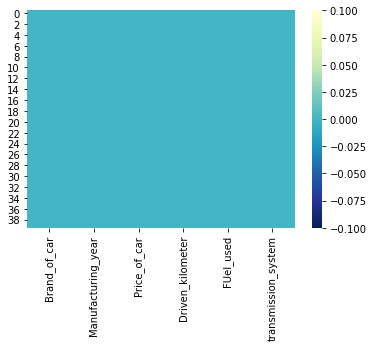

In [9]:
# heatmap for missing data
sns.heatmap(df1.isnull(), cmap='YlGnBu_r')

#for use these dataset cleaning are required

In [10]:
#Copy the dataframe
df=df1.copy()


In [11]:
#Remove ',' from Driven_kilometer column
df['Driven_kilometer']=df1['Driven_kilometer'].apply(lambda x: x.replace(',','') if x!='-' else '-')
df.head()

Brand_of_car Manufacturing_year Price_of_car Driven_kilometer  \
0     Mahindra               2020    12,40,000         14000 km   
1            -                  -            -                -   
2        Honda               2016     6,45,000         38000 km   
3     Mahindra               2016     4,30,000         23000 km   
4     Mahindra               2018     5,90,000         67000 km   

       FUel_used transmission_system  
0         Diesel              Manual  
1              -                   -  
2         Petrol              Manual  
3  CNG & Hybrids              Manual  
4         Diesel              Manual

In [12]:
#Remove Driven_kilometer word from Driven_kilometer 
df['Driven_kilometer']=df['Driven_kilometer'].apply(lambda x: int(x.split(' ')[0]) if x!='-' else 0)
df.head()  

Brand_of_car Manufacturing_year Price_of_car  Driven_kilometer  \
0     Mahindra               2020    12,40,000             14000   
1            -                  -            -                 0   
2        Honda               2016     6,45,000             38000   
3     Mahindra               2016     4,30,000             23000   
4     Mahindra               2018     5,90,000             67000   

       FUel_used transmission_system  
0         Diesel              Manual  
1              -                   -  
2         Petrol              Manual  
3  CNG & Hybrids              Manual  
4         Diesel              Manual

In [13]:

try:
    df['Price_of_car']=df['Price_of_car'].apply(lambda x: x.split(' ')[1] if x!='-' else '0,0')
except IndexError:
    pass



try:
    df['Price_of_car']=df['Price_of_car'].apply(lambda x: str(x.replace(',', '')))
except ValueError:
    pass

In [14]:
df.head()


Brand_of_car Manufacturing_year Price_of_car  Driven_kilometer  \
0     Mahindra               2020      1240000             14000   
1            -                  -           00                 0   
2        Honda               2016       645000             38000   
3     Mahindra               2016       430000             23000   
4     Mahindra               2018       590000             67000   

       FUel_used transmission_system  
0         Diesel              Manual  
1              -                   -  
2         Petrol              Manual  
3  CNG & Hybrids              Manual  
4         Diesel              Manual

In [15]:
df['Price_of_car']=df['Price_of_car'].str.strip()  #Removing the starting space from the string


In [16]:
df['Price_of_car']=pd.to_numeric(df['Price_of_car'].str.replace('-','0'), errors='coerce')  #Converting str to int


In [17]:
df['Price_of_car']=df.Price_of_car.astype(float)  #Converting int to float


In [18]:
df.dtypes


Brand_of_car            object
Manufacturing_year      object
Price_of_car           float64
Driven_kilometer         int64
FUel_used               object
transmission_system     object
dtype: object

In [19]:
#Handling year column
df['Manufacturing_year']=df['Manufacturing_year'].apply(lambda x: int(x.strip()[0:4]) if x!='-' else 0)


In [20]:
med_years=df['Manufacturing_year'].median()  #Finding the median value
med_years

2015.0

In [21]:
df['Manufacturing_year']=df['Manufacturing_year'].apply(lambda x: x if x!=0 else med_years)  #Replacing 0 with median value


In [22]:
df.head()  

Brand_of_car  Manufacturing_year  Price_of_car  Driven_kilometer  \
0     Mahindra              2020.0     1240000.0             14000   
1            -              2015.0           0.0                 0   
2        Honda              2016.0      645000.0             38000   
3     Mahindra              2016.0      430000.0             23000   
4     Mahindra              2018.0      590000.0             67000   

       FUel_used transmission_system  
0         Diesel              Manual  
1              -                   -  
2         Petrol              Manual  
3  CNG & Hybrids              Manual  
4         Diesel              Manual

In [23]:
df['Manufacturing_year']=df['Manufacturing_year'].astype(int)   #Converting again into int

In [24]:
df.dtypes

Brand_of_car            object
Manufacturing_year       int32
Price_of_car           float64
Driven_kilometer         int64
FUel_used               object
transmission_system     object
dtype: object

In [25]:
#Handling fuel_used data
df['FUel_used'].value_counts()


Diesel           17
Petrol           14
CNG & Hybrids     5
-                 4
Name: FUel_used, dtype: int64

In [26]:
#Calculating mode
tmode=df['FUel_used'].mode()
tmode


0    Diesel
dtype: object

In [27]:
#Replacing - with Other kind of fuel_used
df1['FUel_used']=df1['FUel_used'].apply(lambda x: x if x!='-' else 'Other')

#Checking the data
df1['FUel_used'].unique()


array(['Diesel', 'Other', 'Petrol', 'CNG & Hybrids'], dtype=object)

In [28]:
#Handling transmission data
df['transmission_system'].value_counts()

Manual       30
Automatic     7
-             3
Name: transmission_system, dtype: int64

In [29]:
#Replacing - with Manual 
df['transmission_system']=df['transmission_system'].apply(lambda x: x if x!='-' else 'Manual')

#Checking the data
df['transmission_system'].unique()


array(['Manual', 'Automatic'], dtype=object)

In [30]:
#Handling the car name
df['Brand_of_car'].value_counts()

Maruti Suzuki    16
Hyundai           8
Mahindra          4
-                 3
Honda             3
Ford              3
Volkswagen        1
Jaguar            1
Chevrolet         1
Name: Brand_of_car, dtype: int64

In [31]:
#Replacing - with Hyundai 
df['Brand_of_car']=df['Brand_of_car'].apply(lambda x: x if x!='-' else 'Hyundai')

#Checking the data
df['Brand_of_car'].value_counts()

Maruti Suzuki    16
Hyundai          11
Mahindra          4
Honda             3
Ford              3
Volkswagen        1
Jaguar            1
Chevrolet         1
Name: Brand_of_car, dtype: int64

In [32]:
#Check the dataframe
df.head()


Brand_of_car  Manufacturing_year  Price_of_car  Driven_kilometer  \
0     Mahindra                2020     1240000.0             14000   
1      Hyundai                2015           0.0                 0   
2        Honda                2016      645000.0             38000   
3     Mahindra                2016      430000.0             23000   
4     Mahindra                2018      590000.0             67000   

       FUel_used transmission_system  
0         Diesel              Manual  
1              -              Manual  
2         Petrol              Manual  
3  CNG & Hybrids              Manual  
4         Diesel              Manual

In [33]:
#Copy the dataframe
df1=df.copy()


In [34]:
df1.head()


Brand_of_car  Manufacturing_year  Price_of_car  Driven_kilometer  \
0     Mahindra                2020     1240000.0             14000   
1      Hyundai                2015           0.0                 0   
2        Honda                2016      645000.0             38000   
3     Mahindra                2016      430000.0             23000   
4     Mahindra                2018      590000.0             67000   

       FUel_used transmission_system  
0         Diesel              Manual  
1              -              Manual  
2         Petrol              Manual  
3  CNG & Hybrids              Manual  
4         Diesel              Manual

# EDA

Diesel           17
Petrol           14
CNG & Hybrids     5
-                 4
Name: FUel_used, dtype: int64


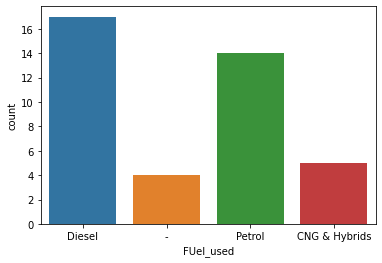

In [35]:
#Plot the countplot for fuel
print(df1['FUel_used'].value_counts())
sns.countplot(df1['FUel_used'])

In [36]:
#Plot the countplot for transmission_system
print(df1['transmission_system'].value_counts())
sns.countplot(df1['transmission_system'])


Manual       33
Automatic     7
Name: transmission_system, dtype: int64


2016    10
2015     7
2017     3
2007     3
2020     2
2014     2
2012     2
2010     2
2005     2
2019     1
2018     1
2013     1
2011     1
2008     1
2003     1
2000     1
Name: Manufacturing_year, dtype: int64


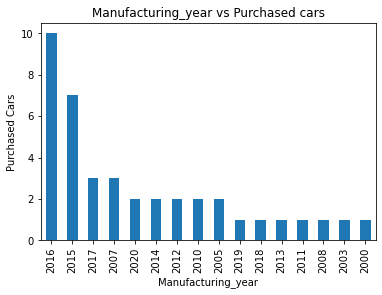

In [37]:
#Value_counts for year
print(df1['Manufacturing_year'].value_counts())

#Plot year vs no of cars
purchased_car_per_year = df1['Manufacturing_year'].value_counts()
purchased_car_per_year.plot(kind='bar')
plt.xlabel("Manufacturing_year")
plt.ylabel("Purchased Cars")
plt.title("Manufacturing_year vs Purchased cars")
plt.show()


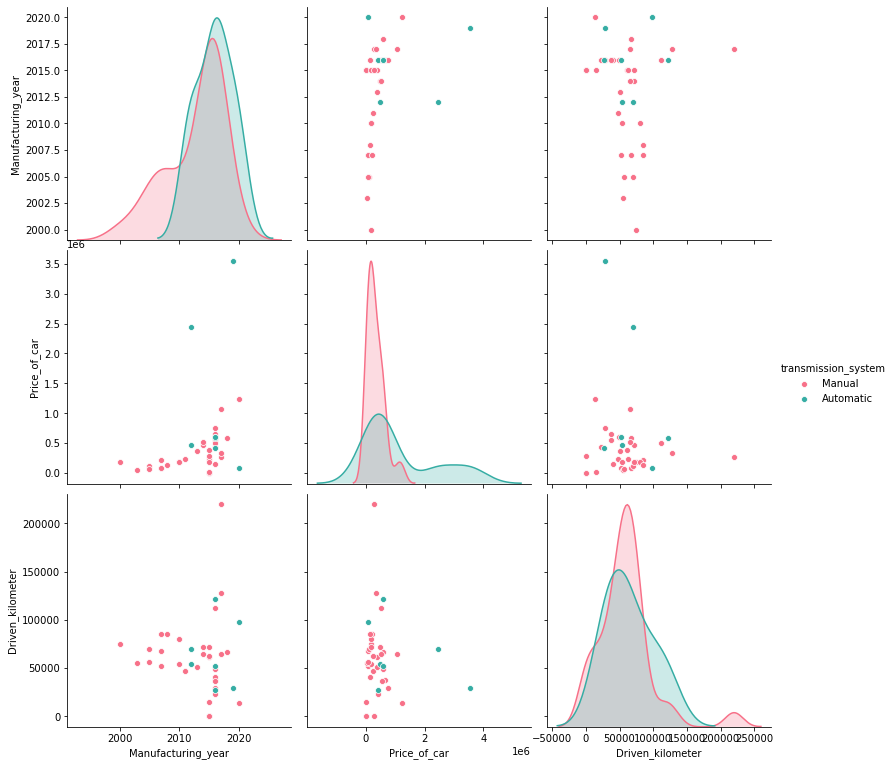

In [38]:
#Plot pairplot for transmission_system
sns.pairplot(df1,hue = 'transmission_system',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5) 
plt.show()


In [39]:
#Assigning dataframe for manual and automatic
manual = df1[df1['transmission_system']=='Manual']
automatic = df1[df1['transmission_system']=='Automatic']


In [40]:
print('Manual type car')
sns.pairplot(manual,hue = 'FUel_used',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()


Manual type car


In [41]:

print('Automatic type car')
sns.pairplot(automatic,hue = 'FUel_used',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

Automatic type car


In [42]:
#Plot for Manufacturing_year vs Driven_kilometer
km_mean = df.groupby('Manufacturing_year')['Driven_kilometer'].mean()

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,8))

ax[0].bar(km_mean.index,km_mean)
sns.distplot(manual['Driven_kilometer'],ax=ax[1])
sns.distplot(automatic['Driven_kilometer'],ax=ax[1])

ax[0].set_title('Average kilometer driven each year')
ax[0].set_xlabel('Kilometer Driven')
ax[0].set_ylabel('Year')

ax[1].set_title('Kilometers driven distribution')
ax[1].legend(['Manual','Automatic'])

plt.show()


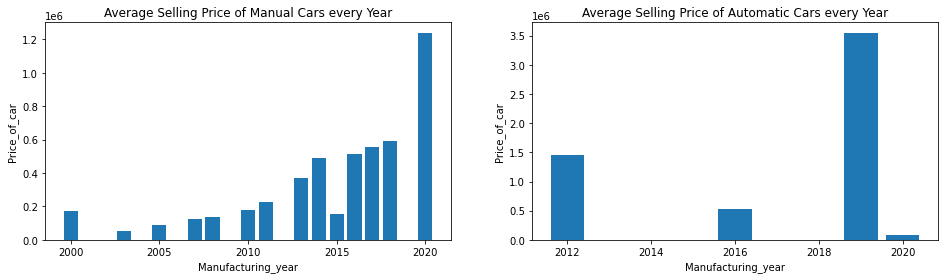

In [43]:
#Manufacturing_year vs Price_of_car
year_mean_manual = df1[df1['transmission_system']=='Manual'].groupby('Manufacturing_year')['Price_of_car'].mean()
year_mean_automatic = df1[df1['transmission_system']=='Automatic'].groupby('Manufacturing_year')['Price_of_car'].mean()

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Manufacturing_year')
ax[0].set_ylabel('Price_of_car')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Manufacturing_year')
ax[1].set_ylabel('Price_of_car')

plt.show()


In [44]:
#Convert fuel and transmission data using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col=['FUel_used','transmission_system']  #columns to be converted
for i in col:
    df1[i] = le.fit_transform(df[i])


In [45]:
#Check the dataset
df1.head()


Brand_of_car  Manufacturing_year  Price_of_car  Driven_kilometer  FUel_used  \
0     Mahindra                2020     1240000.0             14000          2   
1      Hyundai                2015           0.0                 0          0   
2        Honda                2016      645000.0             38000          3   
3     Mahindra                2016      430000.0             23000          1   
4     Mahindra                2018      590000.0             67000          2   

   transmission_system  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [46]:
df1.describe()    #Statistical summary of the dataset


Manufacturing_year  Price_of_car  Driven_kilometer  FUel_used  \
count             40.0000  4.000000e+01         40.000000  40.000000   
mean            2013.2750  4.805250e+05      60028.525000   2.025000   
std                4.7447  6.589762e+05      39884.036617   0.946993   
min             2000.0000  0.000000e+00          0.000000   0.000000   
25%             2010.7500  1.512500e+05      37750.000000   2.000000   
50%             2015.0000  3.050000e+05      55845.000000   2.000000   
75%             2016.0000  5.575000e+05      72000.000000   3.000000   
max             2020.0000  3.550000e+06     220000.000000   3.000000   

       transmission_system  
count            40.000000  
mean              0.825000  
std               0.384808  
min               0.000000  
25%               1.000000  
50%               1.000000  
75%               1.000000  
max               1.000000

The 75th percentile and max value difference for driven_Kilometer column is high and it is due to the presence of outliers.0 value is minimum for all column.
there is minimum difference between mean and median


In [47]:
#Check correlation of the dataset
corr=df1.corr()  #corr() function provides the correlation value of each column
corr


Manufacturing_year  Price_of_car  Driven_kilometer  \
Manufacturing_year             1.000000      0.344436         -0.050795   
Price_of_car                   0.344436      1.000000         -0.094629   
Driven_kilometer              -0.050795     -0.094629          1.000000   
FUel_used                     -0.161355      0.048257          0.082306   
transmission_system           -0.253841     -0.482460         -0.053128   

                     FUel_used  transmission_system  
Manufacturing_year   -0.161355            -0.253841  
Price_of_car          0.048257            -0.482460  
Driven_kilometer      0.082306            -0.053128  
FUel_used             1.000000            -0.269139  
transmission_system  -0.269139             1.000000

In [48]:
#Correlation with target variable
plt.figure(figsize=(12,8))
df1.drop('Price_of_car',axis=1).corrwith(df1['Price_of_car']).plot(kind='bar',grid=True)
plt.title('Correlation with Target variable')


Text(0.5, 1.0, 'Correlation with Target variable')

In [49]:
#Drop name column
df1.drop(['Brand_of_car'],axis=1,inplace=True)


# Check skewness


In [50]:
df1.skew()


Manufacturing_year    -1.070429
Price_of_car           3.420339
Driven_kilometer       1.646320
FUel_used             -0.814357
transmission_system   -1.778059
dtype: float64

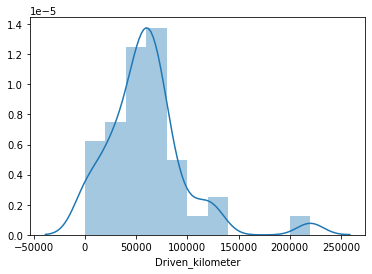

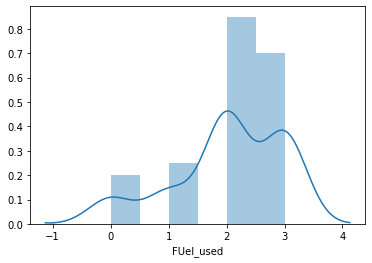

In [51]:
#Plot distplot for checking the distribution of skewness
for col in df1.describe().columns:
    sns.distplot(df1[col])
    plt.show()


#Checking Outlier

In [52]:
collist=df1.columns.values 
ncol=20
nrows=20


In [53]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[collist[i]],color='orange',orient='v')
    plt.tight_layout()


# Handling Outlier

In [54]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)


(array([ 5, 16, 24], dtype=int64), array([1, 2, 1], dtype=int64))

In [55]:
#Removing outliers
df_new=df1[(z<3).all(axis=1)]
df_new


Manufacturing_year  Price_of_car  Driven_kilometer  FUel_used  \
0                 2020     1240000.0             14000          2   
1                 2015           0.0                 0          0   
2                 2016      645000.0             38000          3   
3                 2016      430000.0             23000          1   
4                 2018      590000.0             67000          2   
6                 2007       88000.0             67267          3   
7                 2007       80000.0             52000          3   
8                 2017     1070000.0             65000          2   
9                 2003       55000.0             55000          3   
10                2020       80000.0             98000          3   
11                2016      595000.0             49184          2   
12                2015      380000.0             61000          3   
13                2011      229000.0             47000          0   
14                2012      470000.0             54000          3   
15                2000      175000.0             75000          3   
17                2005      110000.0             70000          1   
18                2007      210000.0             85000          2   
19                2016      410000.0             27000          3   
20                2015      240000.0             63000          2   
21                2016      580000.0            122000          2   
22                2015           0.0                 0          0   
23                2015       15000.0             15000          2   
25                2014      475000.0             72000          2   
26                2015      180000.0             72000          2   
27                2016      595000.0             52000          3   
28                2014      511000.0             65000          2   
29                2010      175000.0             54000          3   
30                2016      155000.0             41000          3   
31                2005       68000.0             56690          2   
32                2010      185000.0             80000          1   
33                2013      370000.0             51000          2   
34                2016      550000.0             37000          3   
35                2016      500000.0            112000          2   
36                2017      330000.0            128000          1   
37                2016      745000.0             29000          2   
38                2008      140000.0             85000          3   
39                2015      280000.0                 0          0   

    transmission_system  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
6                     1  
7                     1  
8                     1  
9                     1  
10                    0  
11                    1  
12                    1  
13                    1  
14                    0  
15                    1  
17                    1  
18                    1  
19                    0  
20                    1  
21                    0  
22                    1  
23                    1  
25                    1  
26                    1  
27                    0  
28                    1  
29                    1  
30                    1  
31                    1  
32                    1  
33                    1  
34                    1  
35                    1  
36                    1  
37                    1  
38                    1  
39                    1

In [56]:
df1.shape

(40, 5)

In [57]:
df_new.shape

(37, 5)

In [58]:
#Percentage loss of data after removing outliers

percentage_loss=((340)/10000)*100   #340 = 10000-9660
print(percentage_loss)


3.4000000000000004


In [59]:
#Preparing dataset for model training

df_x=df_new.drop('Price_of_car',axis=1)   #Independent variables
y=df_new['Price_of_car']    # Target Variable

#Check x data
df_x.head()


Manufacturing_year  Driven_kilometer  FUel_used  transmission_system
0                2020             14000          2                    1
1                2015                 0          0                    1
2                2016             38000          3                    1
3                2016             23000          1                    1
4                2018             67000          2                    1

In [60]:
#Check y data after splitting
y.head()


0    1240000.0
1          0.0
2     645000.0
3     430000.0
4     590000.0
Name: Price_of_car, dtype: float64

In [61]:
for col in df_x.skew().index:
    if col in df_x.describe().columns:
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col])
        if df_x[col].skew()<-0.55:
            df_x[col]=np.sqrt(df_x[col])

In [62]:
df_x.skew() 

Manufacturing_year    -1.047105
Driven_kilometer       0.194498
FUel_used             -1.805266
transmission_system   -2.225809
dtype: float64

In [63]:
#for the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

Manufacturing_year  Driven_kilometer  FUel_used  transmission_system
0             1.466860         -1.377164   0.149801             0.395285
1             0.411627         -1.833243  -2.587116             0.395285
2             0.622778         -0.595315   0.764910             0.395285
3             0.622778         -1.083971  -0.651823             0.395285
4             1.044924          0.349419   0.149801             0.395285
5            -1.279473          0.358117   0.764910             0.395285
6            -1.279473         -0.139237   0.764910             0.395285
7             0.833877          0.284265   0.149801             0.395285
8            -2.126287         -0.041506   0.764910             0.395285
9             1.466860          1.359307   0.764910            -2.529822
10            0.622778         -0.230974   0.149801             0.395285
11            0.411627          0.153956   0.764910             0.395285
12           -0.433503         -0.302122  -2.587116             0.395285
13           -0.222141         -0.074083   0.764910            -2.529822
14           -2.761952          0.610035   0.764910             0.395285
15           -1.702774          0.447150  -0.651823             0.395285
16           -1.279473          0.935805   0.149801             0.395285
17            0.622778         -0.953663   0.764910            -2.529822
18            0.411627          0.219111   0.149801             0.395285
19            0.622778          2.141156   0.149801            -2.529822
20            0.411627         -1.833243  -2.587116             0.395285
21            0.411627         -1.344587   0.149801             0.395285
22            0.200423          0.512304   0.149801             0.395285
23            0.411627          0.512304   0.149801             0.395285
24            0.622778         -0.139237   0.764910            -2.529822
25            0.200423          0.284265   0.149801             0.395285
26           -0.644916         -0.074083   0.764910             0.395285
27            0.622778         -0.497584   0.764910             0.395285
28           -1.702774          0.013549   0.149801             0.395285
29           -0.644916          0.772920  -0.651823             0.395285
30           -0.010833         -0.171814   0.149801             0.395285
31            0.622778         -0.627893   0.764910             0.395285
32            0.622778          1.815386   0.149801             0.395285
33            0.833877          2.336618  -0.651823             0.395285
34            0.622778         -0.888509   0.149801             0.395285
35           -1.067901          0.935805   0.764910             0.395285
36            0.411627         -1.833243  -2.587116             0.395285

# Building the model of Dataset

In [64]:
#Find the best random state and r2_score
for i in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)


In [65]:
#Creat train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)


In [66]:
#find the suitable model for dataset
LR=LinearRegression()
l=Lasso()
en=ElasticNet()
rd=Ridge()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()












models= []
models.append(('Linear Regression',LR))
models.append(('Lasso Regression',l))
models.append(('Elastic Net Regression',en))
models.append(('Ridge Regression',rd))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))
models.append(('RandomForestRegressor',rf))
models.append(('AdaBoostRegressor',ab))
models.append(('GradientBoostingRegressor',gb))


In [67]:
#Find the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')


****************************** Linear Regression ***************************


LinearRegression()


r2_score:  -0.6387830341547558


cross_val_score:  -0.7105358421288285


Standard Deviation:  1.038373919152006


Mean Absolute Error:  257405.09821329228


Mean Squared Error:  106070231885.66656


Root Mean Squared Error:  325684.25182324456



****************************** Lasso Regression ***************************


Lasso()


r2_score:  -0.6387861668766326


cross_val_score:  -0.7105190426469067


Standard Deviation:  1.0383580769772058


Mean Absolute Error:  257404.80707585378


Mean Squared Error:  106070434651.09004


Root Mean Squared Error:  325684.5631145112



****************************** Elastic Net Regression ***************************


ElasticNet()


r2_score:  -0.42357669743163706


cross_val_score:  -0.1554490902307564


Standard Deviation:  0.31570283119686865


Mean Absolute Error:  242960.35141876875


Mean Squared Error:  92141001741.26271


Root Mean Squared 

# Hyperparameter Tuning
Random Forest Regressor

In [68]:
#Creat parameter list to pass in GridSearchCV
parameters={'criterion':['mse','mae'],'n_estimators':[50,100,500],'max_features':['auto','sqrt','log2']}


In [69]:
#Using GridSearchCV to run the parameters and checking final accuracy
rf=RandomForestRegressor()
grid=GridSearchCV(rf,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator


{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 100}
0.4582761318554847


In [70]:
#Using the best parameters obtained
RF=RandomForestRegressor(random_state=48, n_estimators=100, criterion='mse', max_features='auto')
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(RF,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  -50.255443721299486
Cross validation score:  -21.648083546668968
Standard deviation:  0.4879476248981202


Mean absolute error:  233739.5833333333
Mean squared error:  97252835948.6111
Root Mean squared error:  311853.86954246875


KNeighbors Regressor


In [71]:
#Creat parameter list to pass in GridSearchCV
parameters={'n_neighbors':(1,10),'weights':['uniform','distance'],'algorithm':['auto','ball_tree','brute','kd_tree']}


In [72]:
#Using GridSearchCV to run the parameters and checking final r2_score
from sklearn.model_selection import GridSearchCV
knr=KNeighborsRegressor()
grid=GridSearchCV(knr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'algorithm': 'brute', 'n_neighbors': 10, 'weights': 'distance'}
0.34575932908649776


In [73]:
#Using the best parameters obtained
knr=KNeighborsRegressor(algorithm='brute', n_neighbors=10, weights='distance')
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
print('Final r2_score after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(knr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))


Final r2_score after tuning is:  -37.79672696443222
Cross validation score:  -8.763130166570177
Standard deviation:  0.3389230425004745


Mean absolute error:  239926.32709412967
Mean squared error:  89188931527.72874
Root Mean squared error:  298645.15989335696


After applying Hyperparameter Tuning, we can see that RandomForestRegressor is the best performing algorithm among all other algorithms .

In [74]:
rf_prediction=RF.predict(x)
print('Predictions of Random Forest Regressor: ',rf_prediction)


Predictions of Random Forest Regressor:  [994550.         173220.         598050.         480533.33333333
 697600.         112480.         104120.         883200.
  78300.         813000.         561800.         356233.33333333
 203663.33333333 371080.         144420.         116740.
 182170.         467650.         308883.33333333 572550.
 173220.         309910.         452620.         410913.33333333
 551250.         464050.         187030.         301050.
  91690.         205020.         361486.66666667 554350.
 553370.         479250.         509950.         158340.
 173220.        ]


In [75]:
#Compare orignal and predicted values with the help of a dataframe
predictions=pd.DataFrame({'Original_price':y, 'Predicted_price':rf_prediction})
predictions


Original_price  Predicted_price
0        1240000.0    994550.000000
1              0.0    173220.000000
2         645000.0    598050.000000
3         430000.0    480533.333333
4         590000.0    697600.000000
6          88000.0    112480.000000
7          80000.0    104120.000000
8        1070000.0    883200.000000
9          55000.0     78300.000000
10         80000.0    813000.000000
11        595000.0    561800.000000
12        380000.0    356233.333333
13        229000.0    203663.333333
14        470000.0    371080.000000
15        175000.0    144420.000000
17        110000.0    116740.000000
18        210000.0    182170.000000
19        410000.0    467650.000000
20        240000.0    308883.333333
21        580000.0    572550.000000
22             0.0    173220.000000
23         15000.0    309910.000000
25        475000.0    452620.000000
26        180000.0    410913.333333
27        595000.0    551250.000000
28        511000.0    464050.000000
29        175000.0    187030.000000
30        155000.0    301050.000000
31         68000.0     91690.000000
32        185000.0    205020.000000
33        370000.0    361486.666667
34        550000.0    554350.000000
35        500000.0    553370.000000
36        330000.0    479250.000000
37        745000.0    509950.000000
38        140000.0    158340.000000
39        280000.0    173220.000000

In [76]:
#Saving the model
import pickle
filename='Car_Price_Prediction_Project.pkl'   #Specifying the filename
pickle.dump(RF,open(filename,'wb'))


In [77]:
#Saving the predicted values
results=pd.DataFrame(rf_prediction)
results.to_csv('Car_Price_Prediction_Results.csv')
